In [1]:
#Importamos las librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('C:/Users/Layla/Desktop/Docencia/Coder House/Materiales complementarios/Mod 4 - Data Science/5. Analisis Multivariado/Datos/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
#Reemplazar el Outcome de 1 a 'Diab' y 0 a 'Non-Diab'
df.Outcome = df.Outcome.replace({0:'Non-Diab',1:'Diab'})
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age   Outcome  
0                     0.627   50      Diab  
1                     0.351   31  Non-Diab  
2                     0.672   32      Diab  
3                     0.167   21  Non-Diab  
4                     2.288   33      Diab

In [20]:
#Renombrar la columna DiabetesPedigreeFunction a DPF
df.DiabetesPedigreeFunction = df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI DPF  Age  \
0            6      148             72             35        0  33.6   6   50   
1            1       85             66             29        0  26.6   1   31   
2            8      183             64              0        0  23.3   8   32   
3            1       89             66             23       94  28.1   1   21   
4            0      137             40             35      168  43.1   0   33   

    Outcome  
0      Diab  
1  Non-Diab  
2      Diab  
3  Non-Diab  
4      Diab

In [26]:
#Verificamos los tipos de datos
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF                int64
Age                int64
Outcome           object
dtype: object

In [25]:
#Convertir a la variable: DPF en Integer y verificar su correcta conversion
df["DPF"] = pd.to_numeric(df["DPF"])

In [ ]:
#Validacion cambio de dato
df.dtypes

In [22]:
#Shape
df.shape

(768, 9)

In [23]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    object 
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 54.1+ KB


In [15]:
#Estadisticos básicos
df.describe().T

count        mean         std   min   25%    50%     75%    max
Pregnancies    768.0    3.845052    3.369578   0.0   1.0    3.0    6.00   17.0
Glucose        768.0  120.894531   31.972618   0.0  99.0  117.0  140.25  199.0
BloodPressure  768.0   69.105469   19.355807   0.0  62.0   72.0   80.00  122.0
SkinThickness  768.0   20.536458   15.952218   0.0   0.0   23.0   32.00   99.0
Insulin        768.0   79.799479  115.244002   0.0   0.0   30.5  127.25  846.0
BMI            768.0   31.992578    7.884160   0.0  27.3   32.0   36.60   67.1
Age            768.0   33.240885   11.760232  21.0  24.0   29.0   41.00   81.0

<Figure size 720x480 with 0 Axes>

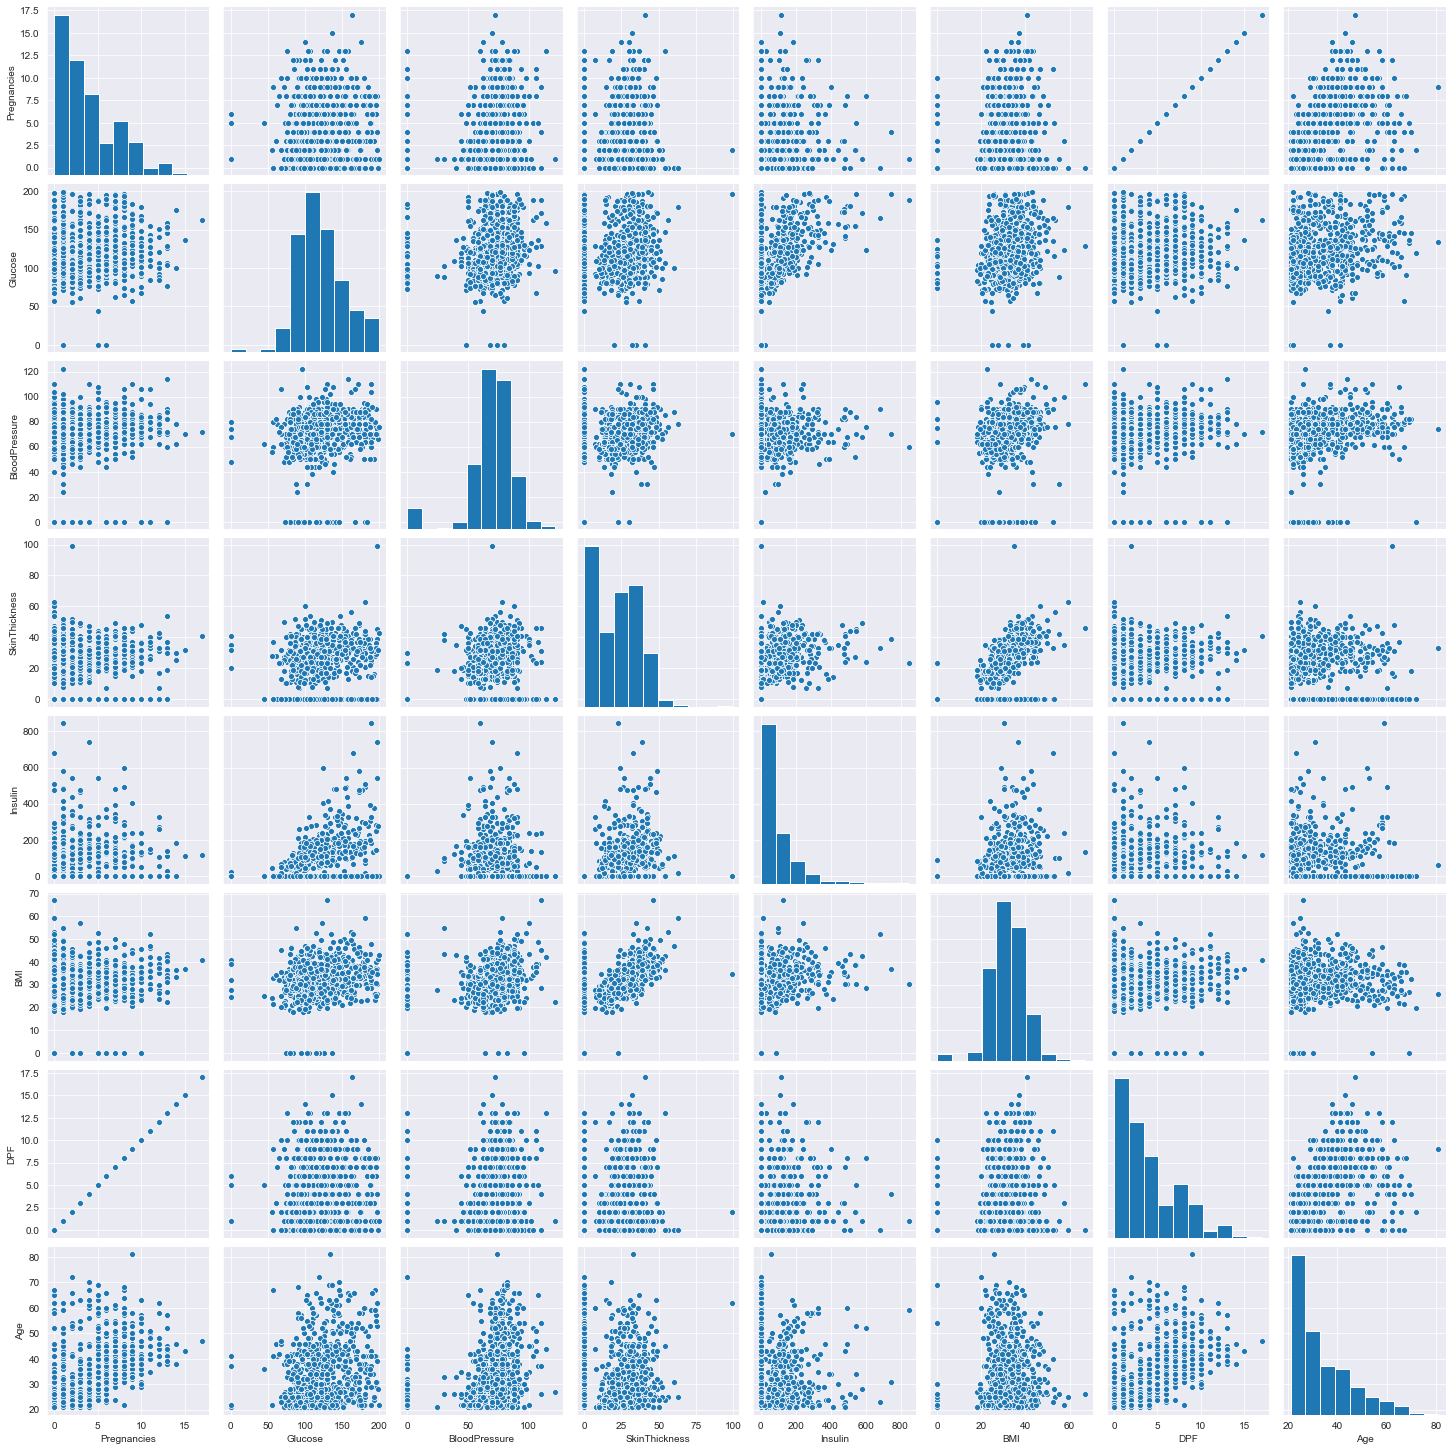

In [16]:
#Crear un Pairplot del dataset
plt.figure(dpi=120)
sns.pairplot(df)
plt.show()

<Figure size 720x480 with 0 Axes>

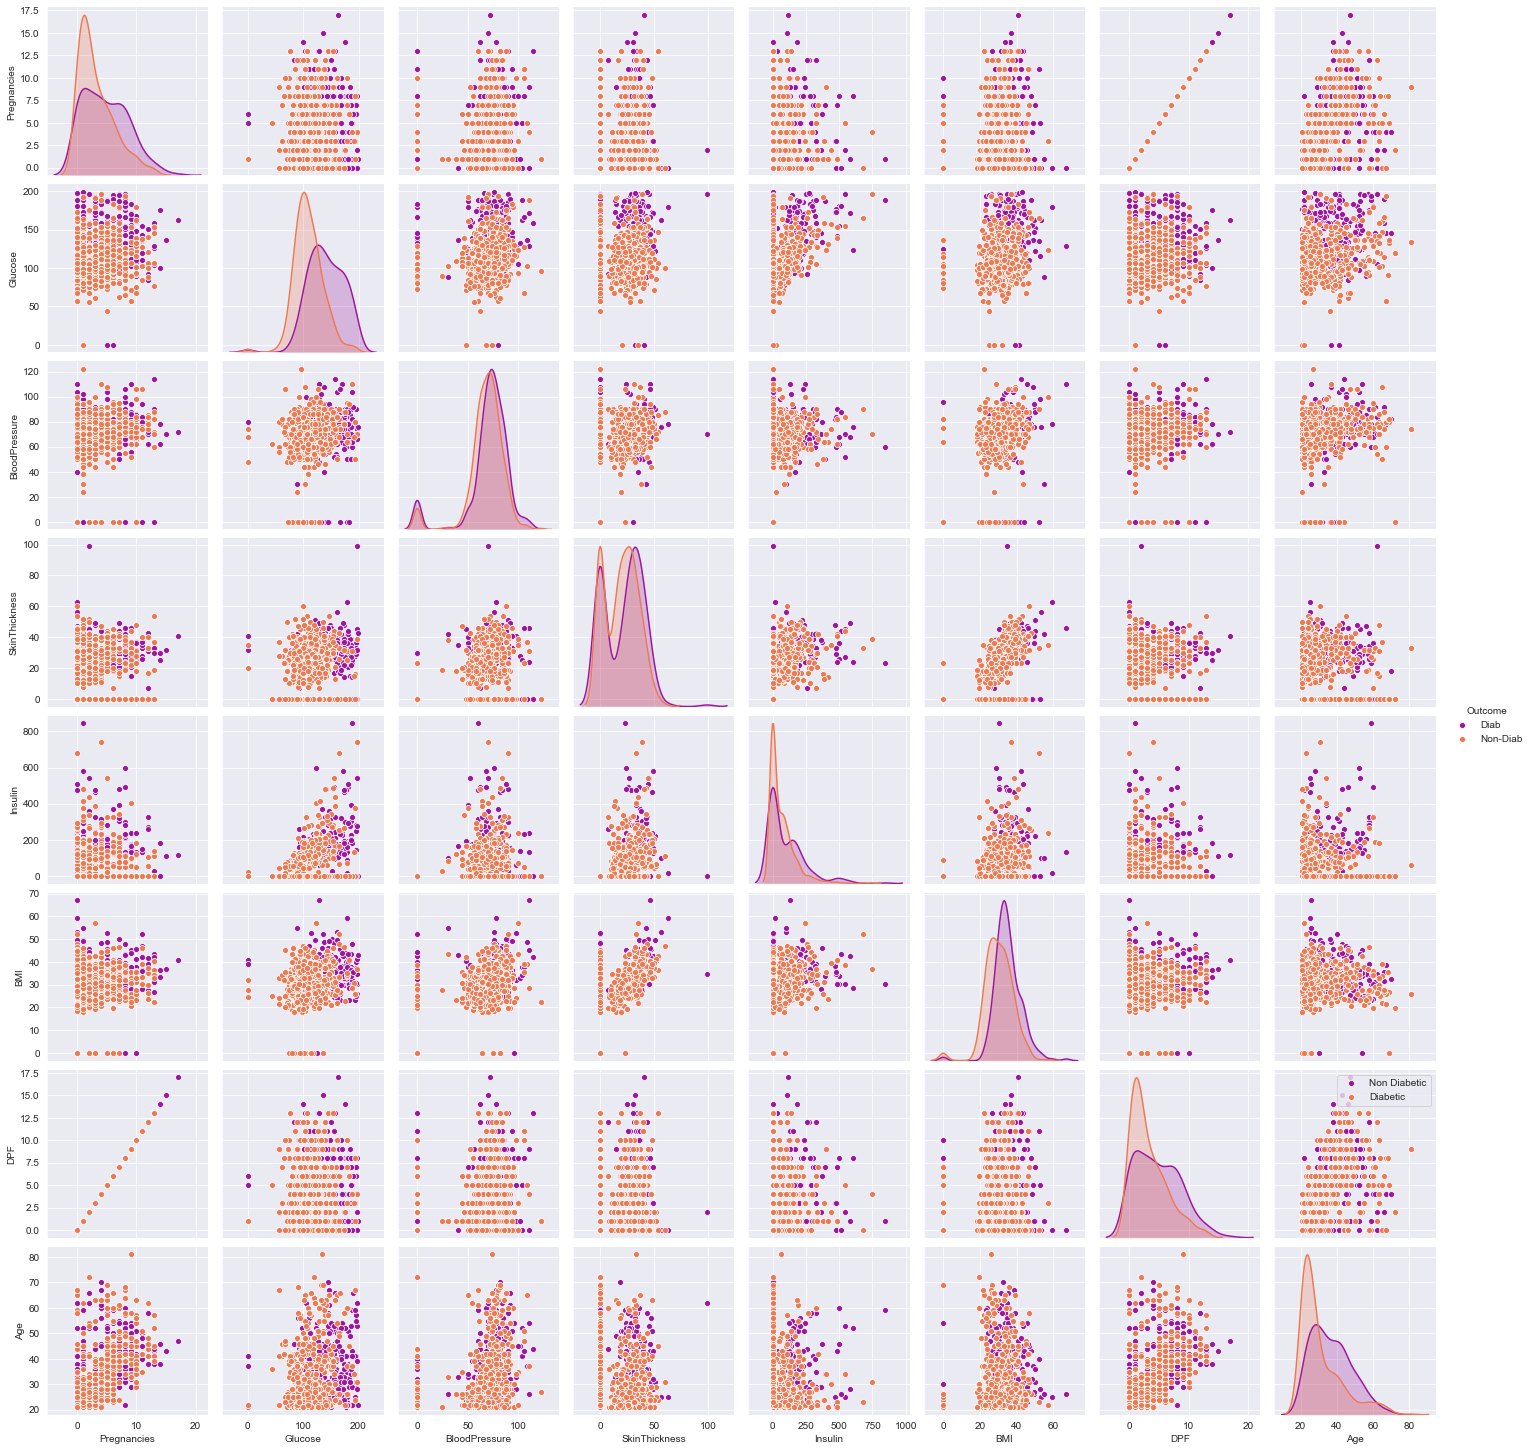

In [17]:
#Crear el Pairplot pero ahora con el atributo hue = 'Outcome'. Las leyendas deberán decir: 'Non Diabetic','Diabetic'
plt.figure(dpi = 120)
sns.pairplot(df,hue = 'Outcome',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

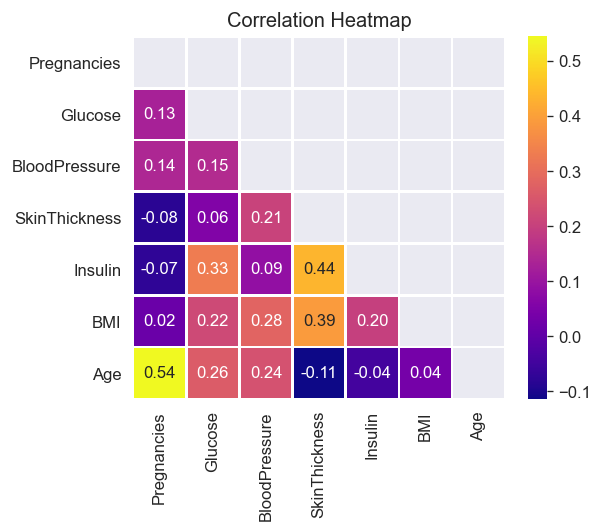

In [18]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Joint plot de Glucosa con otras variables ==> 

Correlacion entre Glucose y Pregnancies ==>  0.129458671499273


<Figure size 500x400 with 0 Axes>

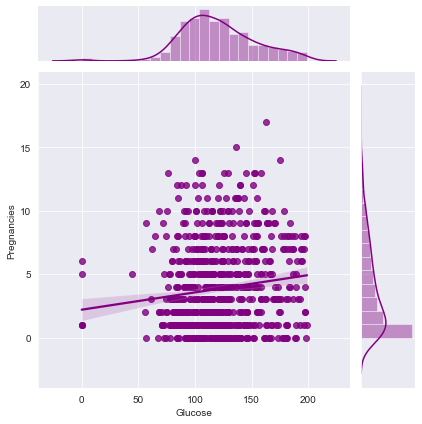

Correlacion entre Glucose y BloodPressure ==>  0.15258958656866448


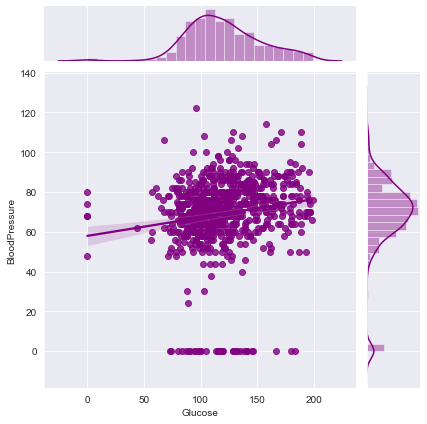

Correlacion entre Glucose y SkinThickness ==>  0.057327890738176825


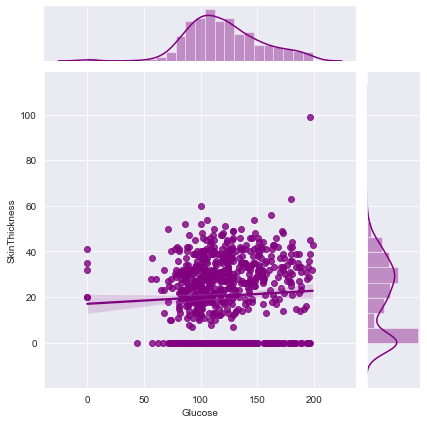

Correlacion entre Glucose y Insulin ==>  0.3313571099202081


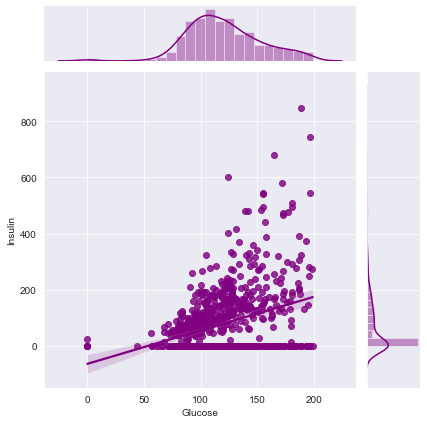

Correlacion entre Glucose y BMI ==>  0.22107106945898305


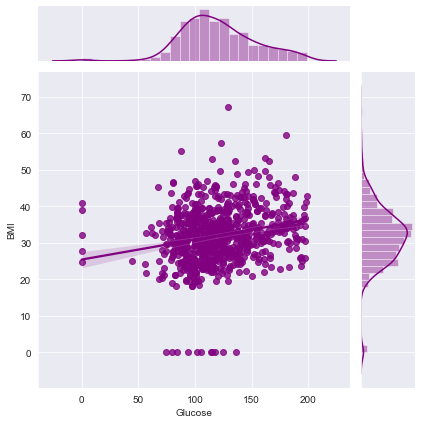

Correlacion entre Glucose y DPF ==>  0.129458671499273


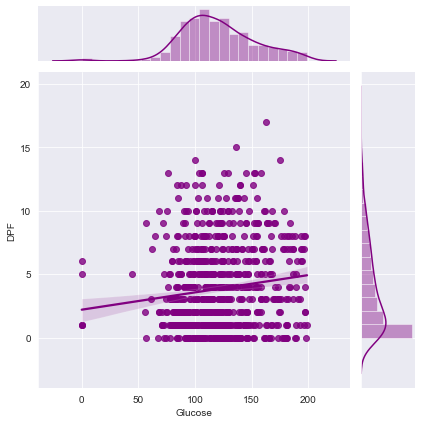

Correlacion entre Glucose y Age ==>  0.26351431982433376


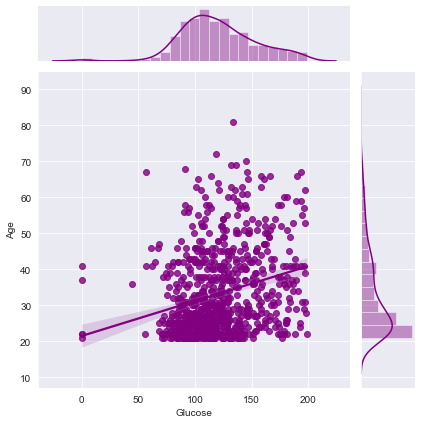

In [32]:
#JoinPlot
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de Glucosa con otras variables ==> \n")
for i in  df.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Correlacion entre Glucose y {i} ==> ",df.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=df,kind = 'regression',color = 'purple')
        plt.show()

**Insight**: La glucosa muestra una asociación lineal débil positiva con las otras variables del conjunto de datos. Eso significa que al aumentar el nivel de glucosa en los pacientes, también aumentarán las otras variables.

Joint plot de BloodPressure con otras variables ==> 

Correlacion entre BloodPressure y SkinThickness ==>  0.2073705384030703


<Figure size 500x400 with 0 Axes>

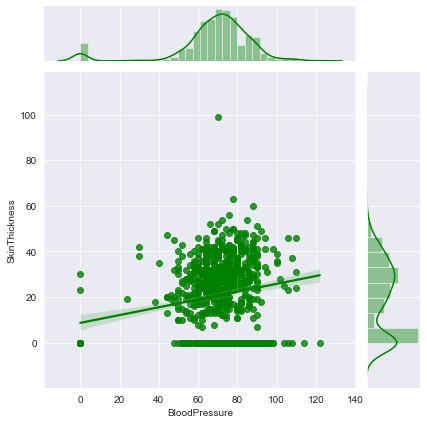

Correlacion entre BloodPressure y Insulin ==>  0.08893337837319296


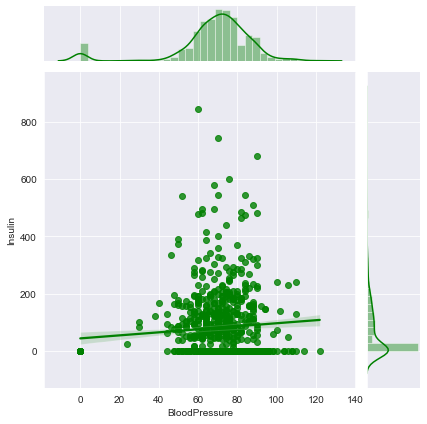

Correlacion entre BloodPressure y BMI ==>  0.28180528884991074


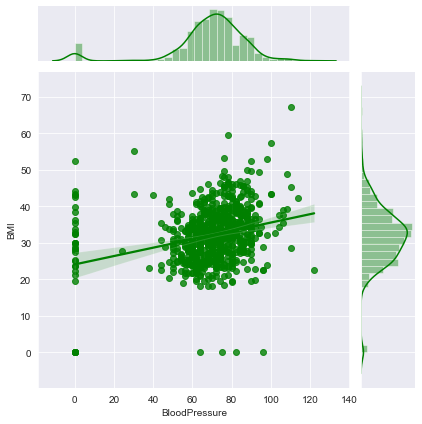

Correlacion entre BloodPressure y DPF ==>  0.14128197740714024


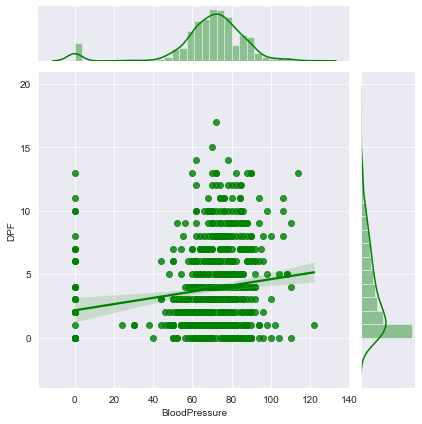

Correlacion entre BloodPressure y Age ==>  0.23952794642136382


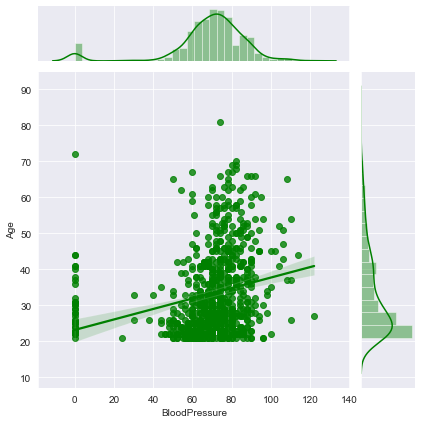

In [29]:
#Crear el join plot entre BloodPressure y el resto de las variables con su correspondiente interpretación.

col = list(df.columns)
idx = col.index('BloodPressure')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de BloodPressure con otras variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre BloodPressure y {col[i]} ==> ",df.corr().loc['BloodPressure'][col[i]])
    sns.jointplot(x='BloodPressure',y=col[i],data=df,kind = 'regression',color = 'green')
    plt.show()

**Insight**: BloodPressure muestra una asociación lineal débil positiva con las otras variables del conjunto de datos dado. Eso significa que al aumentar el nivel de BP en los pacientes, también aumentarán el resto de las variables.

Joint plot de SkinThickness con otras variables ==> 

Correlacion entre SkinThickness y Insulin ==>  0.4367825701200101


<Figure size 500x400 with 0 Axes>

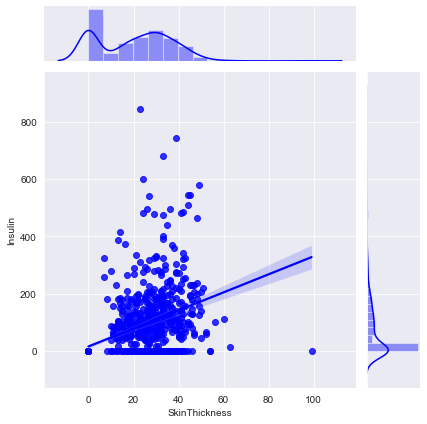

Correlacion entre SkinThickness y BMI ==>  0.3925732041590375


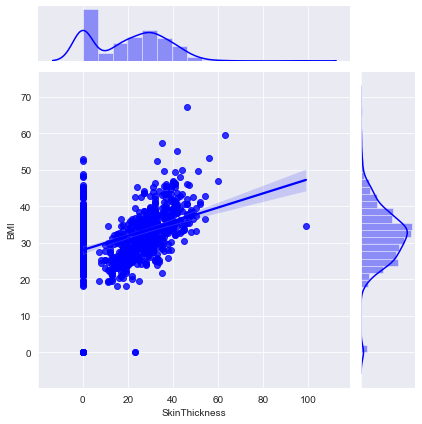

Correlacion entre SkinThickness y DPF ==>  -0.08167177444900703


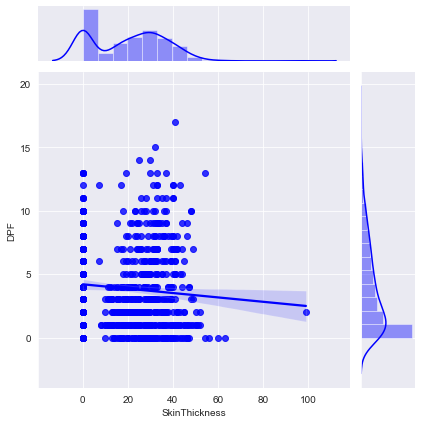

Correlacion entre SkinThickness y Age ==>  -0.11397026236774202


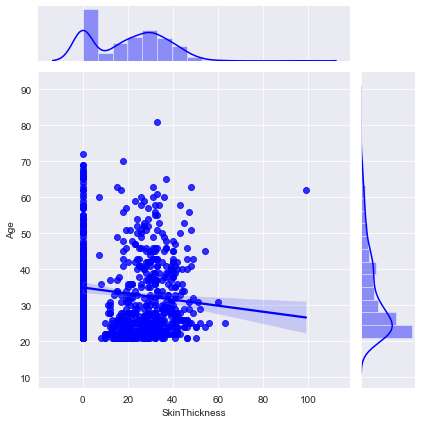

In [31]:
#Crear el join plot entre SkinThickness y el resto de las variables con su correspondiente interpretación.

col = list(df.columns)
idx = col.index('SkinThickness')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de SkinThickness con otras variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre SkinThickness y {col[i]} ==> ",df.corr().loc['SkinThickness'][col[i]])
    sns.jointplot(x='SkinThickness',y=col[i],data=df,kind = 'regression',color = 'blue')
    plt.show()

**Insight**: SkinThickness muestra una asociación lineal débil positiva con el resto de las variables, excepto con la edad. Eso significa que al aumentar el SkinThickness en los pacientes, las otras variables también aumentarán. SkinThickness con la edad muestran una correlación negativa débil es decir, al aumentar SkinThickness, la edad disminuirá.